# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

## Generate Cities List

In [3]:
lat = np.random.uniform(low=-90, high=90, size=1000)
lng = np.random.uniform(low=-180, high=180, size=1000)
lat_lng = zip(lat, lng)
LL = list(lat_lng)

In [4]:
cities = []

for x in LL:
    cities.append(citipy.nearest_city(x[0], x[1]).city_name)
    
len(cities)

1000

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
n = 1
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        print(f'Processing Record {n} of {len(cities)} | {city}')
        n=n+1
    else:
        print('City not found. Skipping...')

Processing Record 1 of 1000 | atuona
Processing Record 2 of 1000 | taiyuan
Processing Record 3 of 1000 | hithadhoo
Processing Record 4 of 1000 | qaanaaq
Processing Record 5 of 1000 | barrow
Processing Record 6 of 1000 | nova esperanca
Processing Record 7 of 1000 | mataura
Processing Record 8 of 1000 | bhuban
Processing Record 9 of 1000 | rikitea
Processing Record 10 of 1000 | qaanaaq
Processing Record 11 of 1000 | lumsden
Processing Record 12 of 1000 | doraha
Processing Record 13 of 1000 | castro
Processing Record 14 of 1000 | kisangani
Processing Record 15 of 1000 | natal
Processing Record 16 of 1000 | thompson
Processing Record 17 of 1000 | rikitea
Processing Record 18 of 1000 | grindavik
Processing Record 19 of 1000 | ushuaia
Processing Record 20 of 1000 | chifeng
Processing Record 21 of 1000 | sitka
Processing Record 22 of 1000 | muros
Processing Record 23 of 1000 | punta arenas
Processing Record 24 of 1000 | bathsheba
Processing Record 25 of 1000 | sao filipe
Processing Record 26 

Processing Record 196 of 1000 | puerto madryn
Processing Record 197 of 1000 | busselton
Processing Record 198 of 1000 | rikitea
Processing Record 199 of 1000 | diamantino
Processing Record 200 of 1000 | hambantota
Processing Record 201 of 1000 | provideniya
Processing Record 202 of 1000 | albany
Processing Record 203 of 1000 | lithgow
Processing Record 204 of 1000 | zhoucheng
Processing Record 205 of 1000 | qaanaaq
Processing Record 206 of 1000 | corona
Processing Record 207 of 1000 | batagay-alyta
Processing Record 208 of 1000 | evensk
Processing Record 209 of 1000 | olovi
Processing Record 210 of 1000 | toppenish
City not found. Skipping...
Processing Record 211 of 1000 | dawlatabad
Processing Record 212 of 1000 | berlevag
Processing Record 213 of 1000 | ginir
Processing Record 214 of 1000 | dikson
Processing Record 215 of 1000 | hithadhoo
Processing Record 216 of 1000 | avarua
Processing Record 217 of 1000 | katherine
City not found. Skipping...
Processing Record 218 of 1000 | saint

Processing Record 380 of 1000 | tuktoyaktuk
City not found. Skipping...
Processing Record 381 of 1000 | bluff
City not found. Skipping...
Processing Record 382 of 1000 | plouzane
Processing Record 383 of 1000 | mandalgovi
Processing Record 384 of 1000 | vila velha
Processing Record 385 of 1000 | agirish
Processing Record 386 of 1000 | carnarvon
Processing Record 387 of 1000 | ushuaia
City not found. Skipping...
Processing Record 388 of 1000 | albany
Processing Record 389 of 1000 | muroto
Processing Record 390 of 1000 | makakilo city
Processing Record 391 of 1000 | albany
Processing Record 392 of 1000 | nemyriv
Processing Record 393 of 1000 | tuktoyaktuk
Processing Record 394 of 1000 | lasa
Processing Record 395 of 1000 | kruisfontein
Processing Record 396 of 1000 | ambilobe
Processing Record 397 of 1000 | san rafael
Processing Record 398 of 1000 | escuinapa
Processing Record 399 of 1000 | hobart
Processing Record 400 of 1000 | lebu
Processing Record 401 of 1000 | ambositra
Processing R

Processing Record 563 of 1000 | jalu
Processing Record 564 of 1000 | monrovia
Processing Record 565 of 1000 | lorengau
Processing Record 566 of 1000 | najran
Processing Record 567 of 1000 | cayenne
Processing Record 568 of 1000 | manitouwadge
Processing Record 569 of 1000 | tupelo
City not found. Skipping...
Processing Record 570 of 1000 | bluff
Processing Record 571 of 1000 | arraial do cabo
Processing Record 572 of 1000 | naduvattam
Processing Record 573 of 1000 | narsaq
Processing Record 574 of 1000 | belyy yar
Processing Record 575 of 1000 | honningsvag
Processing Record 576 of 1000 | mataura
Processing Record 577 of 1000 | vaini
City not found. Skipping...
Processing Record 578 of 1000 | dikson
Processing Record 579 of 1000 | rikitea
Processing Record 580 of 1000 | oum hadjer
City not found. Skipping...
Processing Record 581 of 1000 | roald
City not found. Skipping...
City not found. Skipping...
Processing Record 582 of 1000 | ponorogo
City not found. Skipping...
Processing Record

Processing Record 743 of 1000 | korla
Processing Record 744 of 1000 | haapiti
Processing Record 745 of 1000 | leningradskiy
Processing Record 746 of 1000 | beloha
Processing Record 747 of 1000 | sangar
Processing Record 748 of 1000 | chuy
Processing Record 749 of 1000 | ushuaia
City not found. Skipping...
Processing Record 750 of 1000 | albany
Processing Record 751 of 1000 | santiago de cuba
Processing Record 752 of 1000 | fairbanks
Processing Record 753 of 1000 | shingu
Processing Record 754 of 1000 | castro
Processing Record 755 of 1000 | yellowknife
Processing Record 756 of 1000 | hermanus
Processing Record 757 of 1000 | poputnaya
Processing Record 758 of 1000 | hithadhoo
Processing Record 759 of 1000 | radhanpur
Processing Record 760 of 1000 | iwanai
Processing Record 761 of 1000 | rikitea
Processing Record 762 of 1000 | liverpool
Processing Record 763 of 1000 | penzance
Processing Record 764 of 1000 | rikitea
Processing Record 765 of 1000 | butaritari
Processing Record 766 of 1000

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
os.path

<module 'posixpath' from '/Users/nicolepipkins/opt/anaconda3/envs/nicole/lib/python3.8/posixpath.py'>

In [7]:
newcities = []
lat = []
lng = []
temp = []
humidity = []
cloud = []
wind = []
country = []
date = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(url)
    data = response.json()
    if response.status_code == 200:
        newcities.append(data["name"])
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        temp.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        cloud.append(data["clouds"]["all"])
        wind.append(data["wind"]["speed"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])

cities_df = pd.DataFrame({
            "City": newcities,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": temp,
            "Humidity": humidity,
            "Cloudiness": cloud,
            "Wind Speed": wind,
            "Country": country,
            "Date": date})

cities_df.to_csv('/Users/nicolepipkins/Desktop/Homework6_PythonAPI/output_data/cities.csv', index=False)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,298.36,79,36,10.12,PF,1600377939
1,Taiyuan,37.87,112.56,281.15,87,0,0.96,CN,1600377939
2,Hithadhoo,-0.60,73.08,301.06,80,86,5.13,MV,1600377670
3,Qaanaaq,77.48,-69.36,266.67,84,51,4.40,GL,1600377939
4,Barrow,71.29,-156.79,281.15,87,90,3.10,US,1600377656


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
cities_df['Humidity'].max()

100

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [45]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,9.240000e+02
mean,5.459513,-6.028290,289.330866,72.822511,51.097403,4.607846,1.600295e+09
std,41.406454,102.094831,8.833043,17.230918,37.657912,2.640671,2.405541e+02
min,-54.800000,-179.170000,264.710000,3.000000,0.000000,0.400000,1.600295e+09
25%,-33.650000,-76.292500,282.040000,63.000000,13.000000,2.430000,1.600295e+09
50%,-0.740000,-18.685000,289.590000,76.000000,47.000000,4.140000,1.600295e+09
75%,42.600000,88.400000,296.250000,87.000000,90.000000,6.700000,1.600295e+09
max,78.220000,179.320000,312.590000,100.000000,100.000000,13.120000,1.600295e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

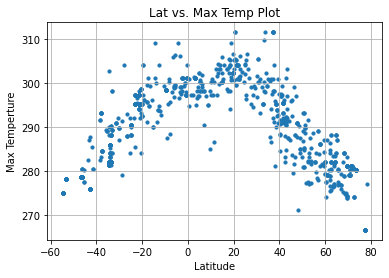

In [8]:
cities_df.plot.scatter("Lat", "Max Temp", s = 10)

plt.title('Lat vs. Max Temp Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temperture')
plt.grid()

## Latitude vs. Humidity Plot

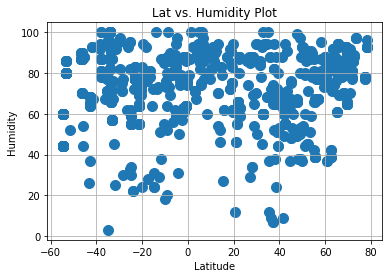

In [40]:
cities_df.plot.scatter("Lat", "Humidity", s = 100)

plt.title('Lat vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

## Latitude vs. Cloudiness Plot

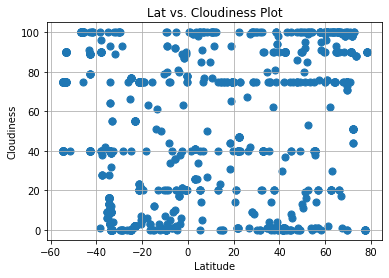

In [42]:
cities_df.plot.scatter("Lat", "Cloudiness", s = 50)

plt.title('Lat vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

## Latitude vs. Wind Speed Plot

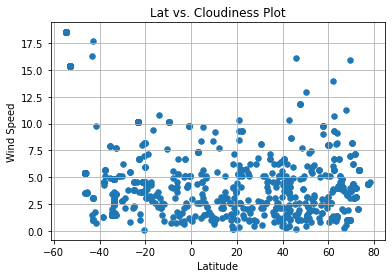

In [10]:
cities_df.plot.scatter("Lat", "Wind Speed", s = 30)

plt.title('Lat vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

## Linear Regression

In [11]:
north_lat = cities_df.loc[(cities_df['Lat'] >= 0)]
north_lat = north_lat.dropna()

south_lat = cities_df.loc[(cities_df['Lat'] < 0)]
south_lat = south_lat.dropna()

x_northlat = north_lat['Lat'].values.reshape(-1,1)
y_northtemp = north_lat['Max Temp'].values.reshape(-1,1)
x_northlat

array([[37.87],
       [77.48],
       [71.29],
       [ 4.44],
       [20.88],
       [77.48],
       [50.65],
       [30.82],
       [ 0.52],
       [55.74],
       [63.84],
       [42.27],
       [57.05],
       [42.78],
       [13.22],
       [14.9 ],
       [71.69],
       [40.43],
       [37.32],
       [54.65],
       [60.42],
       [41.37],
       [20.87],
       [18.44],
       [57.31],
       [42.1 ],
       [25.52],
       [39.18],
       [59.64],
       [71.29],
       [41.76],
       [63.28],
       [63.44],
       [45.17],
       [18.44],
       [62.2 ],
       [38.1 ],
       [42.1 ],
       [69.45],
       [18.09],
       [33.19],
       [ 9.8 ],
       [60.82],
       [71.29],
       [ 9.91],
       [51.03],
       [61.28],
       [21.32],
       [45.52],
       [55.94],
       [10.57],
       [77.48],
       [64.5 ],
       [ 5.21],
       [61.99],
       [47.47],
       [53.86],
       [71.97],
       [20.52],
       [26.33],
       [ 3.52],
       [68.22],
       [

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

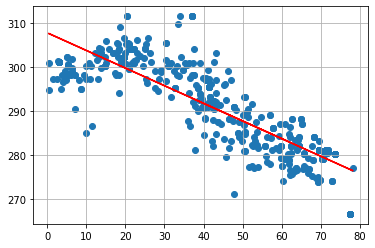

In [20]:
x_northlat = north_lat['Lat'].values.reshape(-1,1)
y_northtemp = north_lat['Max Temp'].values.reshape(-1,1)
x_northlat

linear_regressor = LinearRegression()
linear_regressor.fit(x_northlat, y_northtemp)
y_northtemp_pred = linear_regressor.predict(x_northlat)

plt.scatter(x_northlat, y_northtemp)
plt.plot(x_northlat, y_northtemp_pred, color='red')
plt.grid()

In [23]:
type(LinearRegression())

sklearn.linear_model._base.LinearRegression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

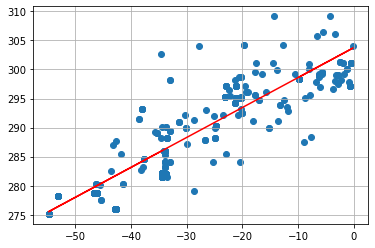

In [13]:
x = south_lat['Lat'].values.reshape(-1,1)
y = south_lat['Max Temp'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.grid()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

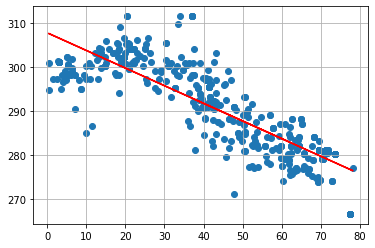

In [14]:
x_northlat = north_lat['Lat'].values.reshape(-1,1)
y_northhum = north_lat['Humidity'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_northlat, y_northtemp)
y_northtemp_pred = linear_regressor.predict(x_northlat)

plt.scatter(x_northlat, y_northtemp)
plt.plot(x_northlat, y_northtemp_pred, color='red')
plt.grid()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

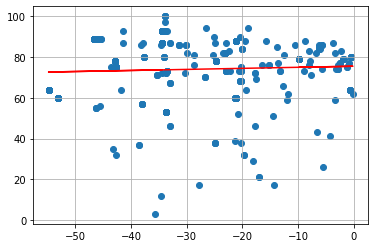

In [15]:
x_southlat = south_lat['Lat'].values.reshape(-1,1)
y_southhum = south_lat['Humidity'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_southlat, y_southhum)
y_southhum_pred = linear_regressor.predict(x_southlat)

plt.scatter(x_southlat, y_southhum)
plt.plot(x_southlat, y_southhum_pred, color='red')
plt.grid()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

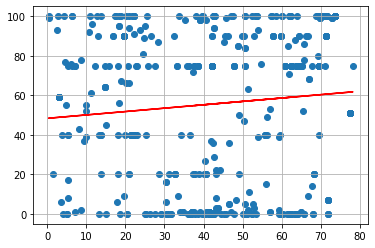

In [16]:
y_northcloud = north_lat['Cloudiness'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_northlat, y_northcloud)
y_northcloud_pred = linear_regressor.predict(x_northlat)

plt.scatter(x_northlat, y_northcloud)
plt.plot(x_northlat, y_northcloud_pred, color='red')
plt.grid()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

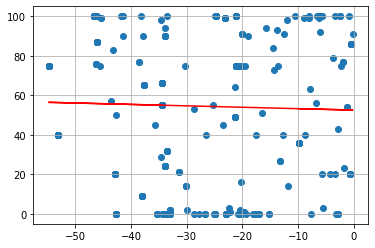

In [17]:
y_southcloud =south_lat['Cloudiness'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_southlat, y_southcloud)
y_southcloud_pred = linear_regressor.predict(x_southlat)

plt.scatter(x_southlat, y_southcloud)
plt.plot(x_southlat, y_southcloud_pred, color='red')
plt.grid()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

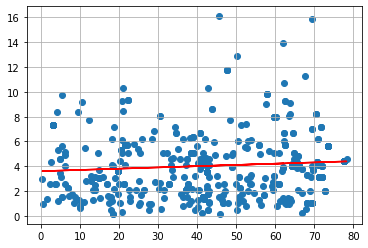

In [18]:
y_northwind =north_lat['Wind Speed'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_northlat, y_northwind)
y_northwind_pred = linear_regressor.predict(x_northlat)

plt.scatter(x_northlat, y_northwind)
plt.plot(x_northlat, y_northwind_pred, color='red')
plt.grid()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

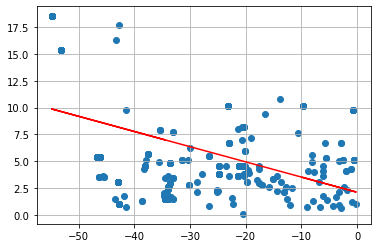

In [19]:
y_southwind =south_lat['Wind Speed'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_southlat, y_southwind)
y_southwind_pred = linear_regressor.predict(x_southlat)

plt.scatter(x_southlat, y_southwind)
plt.plot(x_southlat, y_southwind_pred, color='red')
plt.grid()